In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import pickle
import matplotlib as mat
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("pima_indian_diabetes.csv")
df.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,1,89,66,23,94,28.1,21,0
1,0,137,40,35,168,43.1,33,1
2,3,78,50,32,88,31.0,26,1
3,2,197,70,45,543,30.5,53,1
4,1,189,60,23,846,30.1,59,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9770adf90>,
      dtype=object)

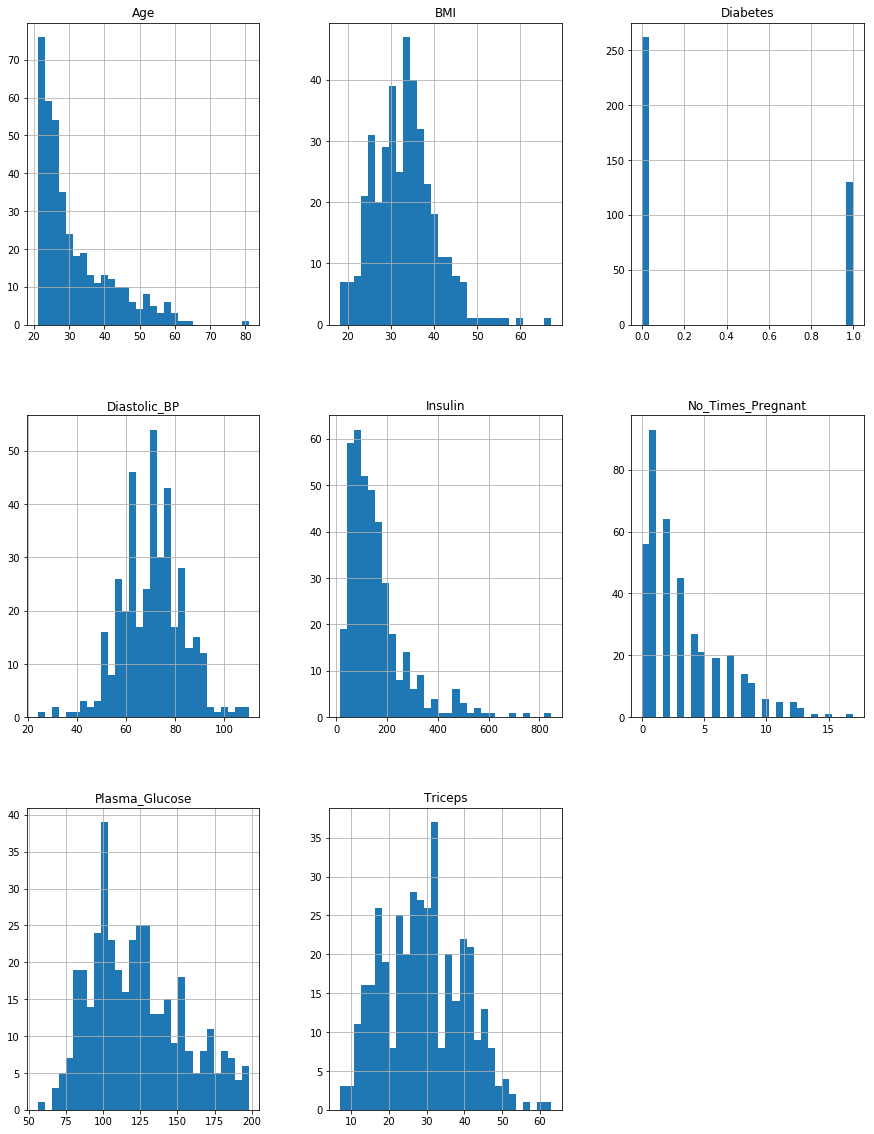

In [3]:
df.hist(bins=30,figsize=(15,20))

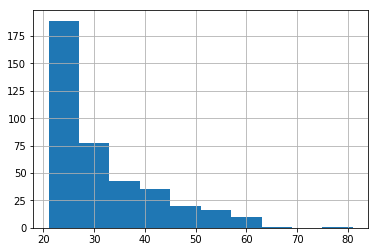

In [77]:
df.Age.hist()

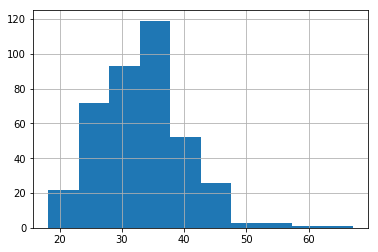

In [4]:
df.BMI.hist()

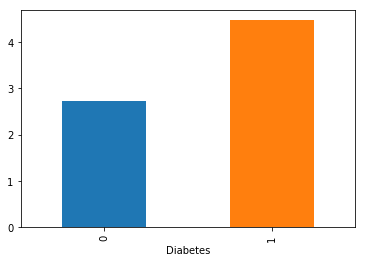

In [7]:
df.groupby("Diabetes")["No_Times_Pregnant"].agg(np.mean).plot(kind="bar")

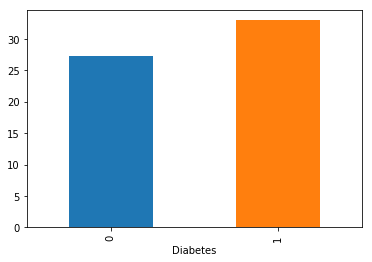

In [5]:
df.groupby("Diabetes")["Triceps"].agg(np.mean).plot(kind="bar")

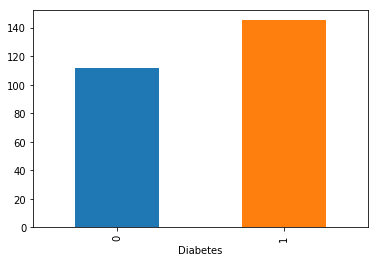

In [81]:
df.groupby("Diabetes")["Plasma_Glucose"].agg(np.mean).plot(kind="bar")

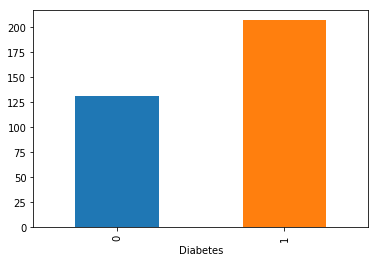

In [6]:
df.groupby("Diabetes")["Insulin"].agg(np.mean).plot(kind="bar")

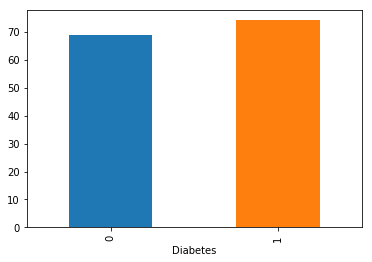

In [83]:
df.groupby("Diabetes")["Diastolic_BP"].agg(np.mean).plot(kind="bar")

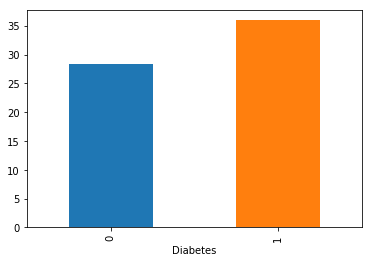

In [7]:
df.groupby("Diabetes")["Age"].agg(np.mean).plot(kind="bar")

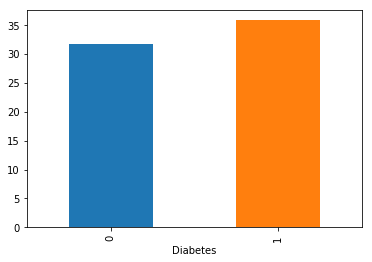

In [8]:
df.groupby("Diabetes")["BMI"].agg(np.mean).plot(kind="bar")

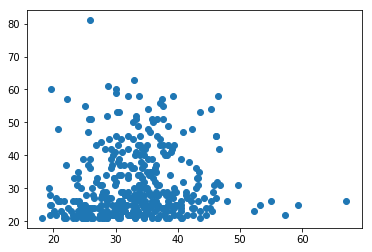

In [9]:
plt.scatter(df["BMI"],df["Age"])

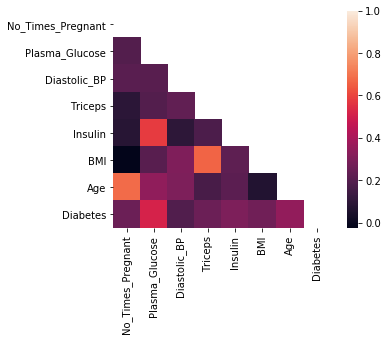

In [10]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(df.corr(),square=True,mask=mask)

In [11]:
db=df.drop(['Diabetes'],axis=1)
labels=df['Diabetes']
db.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age
0,1,89,66,23,94,28.1,21
1,0,137,40,35,168,43.1,33
2,3,78,50,32,88,31.0,26
3,2,197,70,45,543,30.5,53
4,1,189,60,23,846,30.1,59


In [12]:
to=np.random.permutation(len(df))
to

array([297, 173,  66, 389, 387, 206, 337,  95, 367, 120, 336, 124, 293,
       259,  78, 122, 150,  52, 269,  18, 360, 315, 219, 128, 162, 344,
        51, 356,  22, 316, 183, 279, 224, 381, 130,  37, 351, 324,  53,
       326, 109, 320, 227, 197, 379, 342, 250, 166, 106,  31, 155, 284,
       198, 325, 170, 299, 262,  58,  26, 220, 214, 107, 388, 181, 209,
       353,  41, 281, 354, 176, 310,  14, 340, 141, 273, 240, 264, 177,
       149, 194, 137,  65, 193,  60,   1,  70, 179,  92, 280, 294, 249,
       303, 136, 363,  35, 225,   2, 207, 199, 350, 213,  84, 236, 163,
       121, 119, 345,  33, 202, 341, 167, 223, 375, 328,  11, 362, 129,
       201,  80, 115,  36, 382, 145, 157, 127, 306, 196, 263,  34,  43,
       125,  71, 369,   3, 346, 211, 291, 108, 371,  28, 221, 234,  88,
       319, 192, 352, 246,  46, 327, 185, 305, 268, 378, 374, 339, 133,
         4, 114, 361, 237,  79, 243, 178, 311, 256, 290, 100, 364,  56,
       217, 239,  17, 271, 287, 314, 241, 165,  68,  74, 383, 17

In [13]:
train=to[:int(len(df)*0.7)]
train

array([297, 173,  66, 389, 387, 206, 337,  95, 367, 120, 336, 124, 293,
       259,  78, 122, 150,  52, 269,  18, 360, 315, 219, 128, 162, 344,
        51, 356,  22, 316, 183, 279, 224, 381, 130,  37, 351, 324,  53,
       326, 109, 320, 227, 197, 379, 342, 250, 166, 106,  31, 155, 284,
       198, 325, 170, 299, 262,  58,  26, 220, 214, 107, 388, 181, 209,
       353,  41, 281, 354, 176, 310,  14, 340, 141, 273, 240, 264, 177,
       149, 194, 137,  65, 193,  60,   1,  70, 179,  92, 280, 294, 249,
       303, 136, 363,  35, 225,   2, 207, 199, 350, 213,  84, 236, 163,
       121, 119, 345,  33, 202, 341, 167, 223, 375, 328,  11, 362, 129,
       201,  80, 115,  36, 382, 145, 157, 127, 306, 196, 263,  34,  43,
       125,  71, 369,   3, 346, 211, 291, 108, 371,  28, 221, 234,  88,
       319, 192, 352, 246,  46, 327, 185, 305, 268, 378, 374, 339, 133,
         4, 114, 361, 237,  79, 243, 178, 311, 256, 290, 100, 364,  56,
       217, 239,  17, 271, 287, 314, 241, 165,  68,  74, 383, 17

In [14]:
trainset=df.iloc[train]
trainset

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
297,2,98,60,17,120,34.7,22,0
173,1,139,46,19,83,28.7,22,0
66,0,93,60,25,92,28.7,22,0
389,2,88,58,26,16,28.4,22,0
387,0,181,88,44,510,43.3,26,1
206,1,172,68,49,579,42.4,28,1
337,2,155,52,27,540,38.7,25,1
95,4,109,64,44,99,34.8,26,1
367,7,187,50,33,392,33.9,34,1
120,9,124,70,33,402,35.4,34,0


In [15]:
test=to[int(len(df)*0.7):]
test

array([ 82,  19,  64, 301, 329,  49, 282,  29, 168,  10,   7, 169, 232,
       254, 101, 295, 304, 238, 333,  50,  54, 153, 338,   0, 272, 285,
       134, 103, 186, 235,  61, 302,   9, 152, 308, 204, 105, 334, 323,
       148, 126,  67, 283,  47, 274, 143, 229, 307, 322, 210, 296, 357,
       191, 171, 140, 154, 358, 164,  86, 298, 260, 111,  73,  99, 292,
       278,  94, 359,  30, 368, 159, 270,  13,  42, 233, 200, 118,  83,
       184, 195, 212, 110,  44, 288, 321, 190, 161, 266,  45,  77, 372,
        25, 172, 332, 309, 286,  75, 147, 349,  27,  24, 331, 300, 267,
       156, 355,   5, 318, 205, 116, 258,  62, 261,   6, 343,  16,  39,
       276])

In [21]:
testset=df.iloc[test]
testset

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
82,6,134,70,23,130,35.4,29,1
19,9,171,110,24,240,45.4,54,1
64,2,125,60,20,140,33.8,31,0
301,8,124,76,24,600,28.7,52,1
329,2,157,74,35,440,39.4,30,0
49,0,95,85,25,36,37.4,24,1
282,4,131,68,21,166,33.1,28,0
29,1,95,66,13,38,19.6,25,0
168,0,165,76,43,255,47.9,26,0
10,11,143,94,33,146,36.6,51,1


In [22]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(trainset.drop('Diabetes',axis=1),trainset['Diabetes'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
ar=lr.predict(testset.drop('Diabetes',axis=1))

In [25]:
testset['Diabetes']

82     1
19     1
64     0
301    1
329    0
49     1
282    0
29     0
168    0
10     1
7      0
169    1
232    0
254    1
101    1
295    1
304    0
238    0
333    0
50     1
54     0
153    1
338    0
0      0
272    0
285    0
134    0
103    1
186    0
235    0
      ..
45     0
77     1
372    0
25     1
172    0
332    1
309    1
286    0
75     0
147    1
349    0
27     0
24     0
331    1
300    0
267    0
156    0
355    0
5      1
318    0
205    0
116    0
258    1
62     1
261    0
6      1
343    0
16     0
39     0
276    1
Name: Diabetes, Length: 118, dtype: int64

In [26]:
from sklearn.metrics import confusion_matrix
arr=confusion_matrix(ar,testset['Diabetes'])
arr

array([[65, 22],
       [12, 19]])

In [27]:
TP = arr[0][0]
FP = arr[0][1]
FN = arr[1][0]
TN = arr[1][1]
TP



65

In [28]:
import sklearn.metrics 
sklearn.metrics.accuracy_score(testset['Diabetes'],ar)

0.711864406779661

In [29]:
sklearn.metrics.precision_score(testset['Diabetes'],ar)

0.6129032258064516

In [30]:
sklearn.metrics.recall_score(testset['Diabetes'],ar)

0.4634146341463415

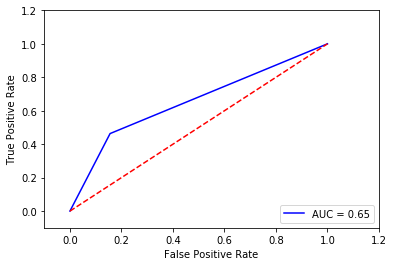

In [63]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(testset['Diabetes'],ar)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0,1],[0,1],'r--') 
plt.xlim([-0.1,1.2]) 
plt.ylim([-0.1,1.2]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate')
plt.show()

In [49]:
scaler = MinMaxScaler()
df2= pd.DataFrame(scaler.fit_transform(df.drop('Diabetes',axis=1)),columns=['No_Times_Pregnant','Plasma_Glucose','Diastolic_BP ','Triceps','Insulin','BMI','Age'])
df2=df2.join(df['Diabetes'])
df2

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,0.058824,0.232394,0.488372,0.285714,0.096154,0.202454,0.000000,0
1,0.000000,0.570423,0.186047,0.500000,0.185096,0.509202,0.200000,1
2,0.176471,0.154930,0.302326,0.446429,0.088942,0.261759,0.083333,1
3,0.117647,0.992958,0.534884,0.678571,0.635817,0.251534,0.533333,1
4,0.058824,0.936620,0.418605,0.285714,1.000000,0.243354,0.633333,1
5,0.294118,0.774648,0.558140,0.214286,0.193510,0.155419,0.500000,1
6,0.000000,0.436620,0.697674,0.714286,0.259615,0.564417,0.166667,1
7,0.058824,0.330986,0.069767,0.553571,0.082933,0.513292,0.200000,0
8,0.058824,0.415493,0.534884,0.410714,0.098558,0.335378,0.183333,1
9,0.176471,0.492958,0.744186,0.607143,0.265625,0.431493,0.100000,0


In [40]:
total=np.random.permutation(len(df2))

In [41]:
train2=total[:int(len(df)*0.7)]

In [42]:
test2=to[int(len(df)*0.7):]

In [50]:
trainset2=df2.iloc[train]
trainset2

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
297,0.117647,0.295775,0.418605,0.178571,0.127404,0.337423,0.016667,0
173,0.058824,0.584507,0.255814,0.214286,0.082933,0.214724,0.016667,0
66,0.000000,0.260563,0.418605,0.321429,0.093750,0.214724,0.016667,0
389,0.117647,0.225352,0.395349,0.339286,0.002404,0.208589,0.016667,0
387,0.000000,0.880282,0.744186,0.660714,0.596154,0.513292,0.083333,1
206,0.058824,0.816901,0.511628,0.750000,0.679087,0.494888,0.116667,1
337,0.117647,0.697183,0.325581,0.357143,0.632212,0.419223,0.066667,1
95,0.235294,0.373239,0.465116,0.660714,0.102163,0.339468,0.083333,1
367,0.411765,0.922535,0.302326,0.464286,0.454327,0.321063,0.216667,1
120,0.529412,0.478873,0.534884,0.464286,0.466346,0.351738,0.216667,0


In [51]:
testset2=df2.iloc[test]
testset2

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
82,0.352941,0.549296,0.534884,0.285714,0.139423,0.351738,0.133333,1
19,0.529412,0.809859,1.000000,0.303571,0.271635,0.556237,0.550000,1
64,0.117647,0.485915,0.418605,0.232143,0.151442,0.319018,0.166667,0
301,0.470588,0.478873,0.604651,0.303571,0.704327,0.214724,0.516667,1
329,0.117647,0.711268,0.581395,0.500000,0.512019,0.433538,0.150000,0
49,0.000000,0.274648,0.709302,0.321429,0.026442,0.392638,0.050000,1
282,0.235294,0.528169,0.511628,0.250000,0.182692,0.304703,0.116667,0
29,0.058824,0.274648,0.488372,0.107143,0.028846,0.028630,0.066667,0
168,0.000000,0.767606,0.604651,0.642857,0.289663,0.607362,0.083333,0
10,0.647059,0.612676,0.813953,0.464286,0.158654,0.376278,0.500000,1


In [52]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(trainset2.drop('Diabetes',axis=1),trainset2['Diabetes'])
array=lr.predict(testset2.drop('Diabetes',axis=1))

In [53]:
array

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0])

In [55]:
from sklearn.metrics import confusion_matrix
arr2=confusion_matrix(array,testset2['Diabetes'])
arr2

array([[68, 20],
       [ 9, 21]])

In [56]:
import sklearn.metrics 
sklearn.metrics.accuracy_score(testset2['Diabetes'],array)

0.7542372881355932

In [58]:
sklearn.metrics.precision_score(testset2['Diabetes'],array)

0.7

In [59]:
sklearn.metrics.recall_score(testset2['Diabetes'],array)

0.5121951219512195

In [67]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
sm

SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)